In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import myutils as my

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# iris['data']

In [15]:
# iris['DESCR']

In [16]:
df = pd.DataFrame(iris['data'],columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
#결측치

#중복치

### 학습셋 분리

In [23]:
X = df.drop(['target'], axis = 1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    stratify=y,
                                                   random_state=2023)
X_train.shape

(120, 4)

In [32]:
X_test.shape

(30, 4)

In [39]:
# 정규화

#정규화할때는 train 데이터로만 정규화를 한다.
#그 결과를 test 데이터에도 적용시킨다.
#test 데이터를 가지고 뭘 하지는 않는다.

#트리 베이스 모델은 정규화를 안해도 된다.
#근데 지금은 voting 하고 있으니까 합시다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

X_train = scaler.fit_transform(X_train)
X_train[:5]

array([[-1.03489951, -2.36337549, -0.14798317, -0.24914986],
       [ 0.51002225,  0.58611712,  0.53283396,  0.55168898],
       [ 0.39118211, -1.9096074 ,  0.41936444,  0.41821584],
       [ 0.27234198, -0.32141907,  0.53283396,  0.2847427 ],
       [-1.03489951, -1.68272335, -0.26145269, -0.24914986]])

In [44]:
#KNN
#Support Vector Machine
#Tree
#Voting

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

clf = VotingClassifier(
    estimators = [('knn',clf1), ('svc', clf2), ('tree', clf3)],
    voting = 'hard',
    weights = [1,1,1]
)

In [46]:
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

In [47]:
clf.score(X_train, y_train)

0.975

### 테스트 스코어

In [50]:
# X_test, y_test 스케일링

X_test = scaler.transform(X_test)
y_test = y_test.values

In [52]:
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0,
       2, 0, 2, 1, 2, 2, 2, 2])

In [56]:
my.print_score(y_test, y_pred, average='macro')
# 다중분류 일때만 macro
# 이진분류 일때는 binary

accuracy: 0.9666666666666667
precision: 0.9696969696969697
recall: 0.9666666666666667


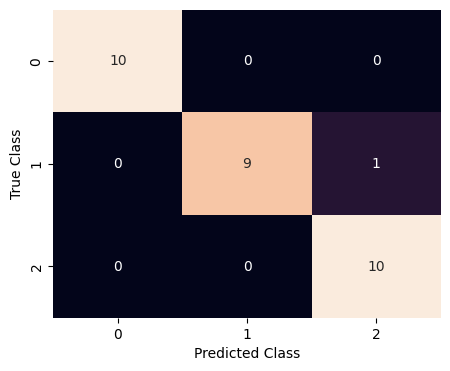

In [60]:
my.plot_confusion_matrix(y_test, y_pred)